In [8]:
import os
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import numpy as np

import qiime2 as q2

%matplotlib inline

# location of this week's data and all the results produced by this notebook 
# - this should be a path relative to your working directory
data_dir = 'project_data'

if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

In [11]:
df_meta = pd.read_csv(f'{data_dir}/cleaned_sample_meta_data.tsv', sep='\t',index_col=0)
df_meta.head()

,sampleid,GEN_age_cat,GEN_age_corrected,GEN_bmi_cat,GEN_bmi_corrected,GEN_cat,GEN_collection_timestamp,GEN_country,GEN_dog,GEN_elevation,...,NUT_probiotic_frequency,NUT_red_meat_frequency,NUT_salted_snacks_frequency,NUT_seafood_frequency,NUT_sugary_sweets_frequency,NUT_vegetable_frequency,NUT_vitamin_b_supplement_frequency,NUT_vitamin_d_supplement_frequency,NUT_whole_eggs,NUT_whole_grain_frequency
1,10317.000050,Not provided,NaN,Overweight,25.61,False,2016-07-06 09:00:00,United Kingdom,False,65.5,...,Rarely,Rarely,Regularly,Occasionally,Regularly,Regularly,Never,Never,Rarely,Occasionally
2,10317.000038,30s,39.0,Overweight,27.67,False,2016-06-29 09:30:00,United Kingdom,False,44.5,...,Never,Occasionally,Daily,Occasionally,Rarely,Occasionally,Never,Never,Regularly,Occasionally
3,10317.000047,50s,56.0,Normal,19.71,False,2016-07-12 17:30:00,Germany,False,8.7,...,Daily,Occasionally,Rarely,Not provided,Rarely,Regularly,Daily,Daily,Rarely,Regularly
6,10317.000046,60s,68.0,Normal,24.12,False,2016-05-10 10:00:00,United Kingdom,False,22.9,...,Never,Rarely,Regularly,Occasionally,Occasionally,Daily,Never,Never,Rarely,Rarely
9,10317.000051,40s,46.0,Normal,22.60,False,2016-05-23 10:05:00,USA,False,261.1,...,Rarely,Occasionally,Regularly,Occasionally,Rarely,Regularly,Occasionally,Never,Occasionally,Regularly


Filter out the columns about Nutrition(NUT):

In [14]:
names=df_meta.columns
NUT_INDEX = names[df_meta.columns.str.contains('NUT')]

df_NUT = df_meta[NUT_INDEX]
df_NUT.head()

,NUT_alcohol_consumption,NUT_alcohol_frequency,NUT_alcohol_types_beercider,NUT_alcohol_types_red_wine,NUT_alcohol_types_sour_beers,NUT_alcohol_types_spiritshard_alcohol,NUT_alcohol_types_unspecified,NUT_alcohol_types_white_wine,NUT_artificial_sweeteners,NUT_diet_type,...,NUT_probiotic_frequency,NUT_red_meat_frequency,NUT_salted_snacks_frequency,NUT_seafood_frequency,NUT_sugary_sweets_frequency,NUT_vegetable_frequency,NUT_vitamin_b_supplement_frequency,NUT_vitamin_d_supplement_frequency,NUT_whole_eggs,NUT_whole_grain_frequency
1,False,Not provided,True,False,False,False,False,False,Never,Omnivore,...,Rarely,Rarely,Regularly,Occasionally,Regularly,Regularly,Never,Never,Rarely,Occasionally
2,True,Regularly,True,False,False,False,False,False,Rarely,Omnivore,...,Never,Occasionally,Daily,Occasionally,Rarely,Occasionally,Never,Never,Regularly,Occasionally
3,False,Never,False,False,False,False,True,False,Never,Omnivore,...,Daily,Occasionally,Rarely,Not provided,Rarely,Regularly,Daily,Daily,Rarely,Regularly
6,True,Daily,True,False,False,False,False,False,Never,Omnivore,...,Never,Rarely,Regularly,Occasionally,Occasionally,Daily,Never,Never,Rarely,Rarely
9,True,Regularly,True,False,False,False,False,True,Occasionally,Omnivore,...,Rarely,Occasionally,Regularly,Occasionally,Rarely,Regularly,Occasionally,Never,Occasionally,Regularly


In [28]:
names_NUT = df_NUT.columns.tolist()

### Check eating habits

In [ ]:
#Extract frequency data and categorical data to generate graphs

In [26]:
df_NUT.dtypes

NUT_alcohol_consumption                    bool
NUT_alcohol_frequency                    object
NUT_alcohol_types_beercider                bool
NUT_alcohol_types_red_wine                 bool
NUT_alcohol_types_sour_beers               bool
NUT_alcohol_types_spiritshard_alcohol      bool
NUT_alcohol_types_unspecified              bool
NUT_alcohol_types_white_wine               bool
NUT_artificial_sweeteners                object
NUT_diet_type                            object
NUT_drinks_per_session                   object
NUT_fed_as_infant                        object
NUT_fermented_plant_frequency            object
NUT_frozen_dessert_frequency             object
NUT_fruit_frequency                      object
NUT_gluten                               object
NUT_high_fat_red_meat_frequency          object
NUT_homecooked_meals_frequency           object
NUT_lowgrain_diet_type                     bool
NUT_meat_eggs_frequency                  object
NUT_milk_cheese_frequency               

In [29]:
names_NUT

['NUT_alcohol_consumption',
 'NUT_alcohol_frequency',
 'NUT_alcohol_types_beercider',
 'NUT_alcohol_types_red_wine',
 'NUT_alcohol_types_sour_beers',
 'NUT_alcohol_types_spiritshard_alcohol',
 'NUT_alcohol_types_unspecified',
 'NUT_alcohol_types_white_wine',
 'NUT_artificial_sweeteners',
 'NUT_diet_type',
 'NUT_drinks_per_session',
 'NUT_fed_as_infant',
 'NUT_fermented_plant_frequency',
 'NUT_frozen_dessert_frequency',
 'NUT_fruit_frequency',
 'NUT_gluten',
 'NUT_high_fat_red_meat_frequency',
 'NUT_homecooked_meals_frequency',
 'NUT_lowgrain_diet_type',
 'NUT_meat_eggs_frequency',
 'NUT_milk_cheese_frequency',
 'NUT_milk_substitute_frequency',
 'NUT_olive_oil',
 'NUT_poultry_frequency',
 'NUT_prepared_meals_frequency',
 'NUT_probiotic_frequency',
 'NUT_red_meat_frequency',
 'NUT_salted_snacks_frequency',
 'NUT_seafood_frequency',
 'NUT_sugary_sweets_frequency',
 'NUT_vegetable_frequency',
 'NUT_vitamin_b_supplement_frequency',
 'NUT_vitamin_d_supplement_frequency',
 'NUT_whole_eggs',
 

In [32]:
#Extract eating habits excluding alcohol


ALC_INDEX =df_NUT.columns
ALC_INDEX = names[df_NUT.columns.str.contains('lcohol')]

df_habits = df_habits[ALC_INDEX]

SyntaxError: invalid syntax (2875775937.py, line 7)

/tmp/ipykernel_361/879641392.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


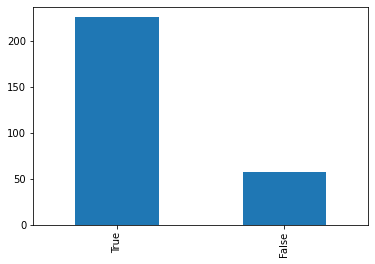

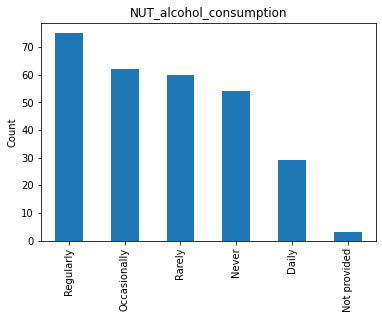

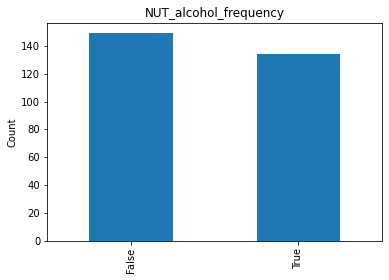

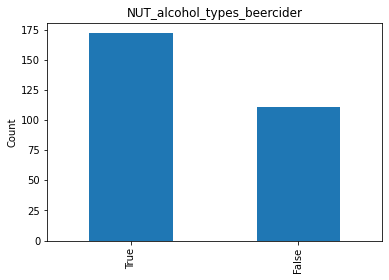

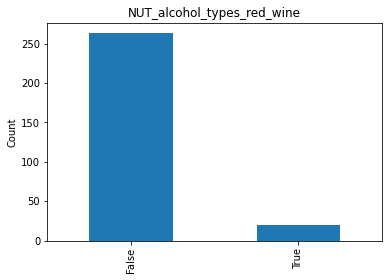

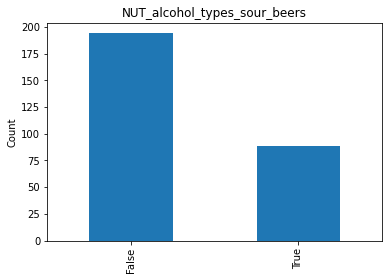

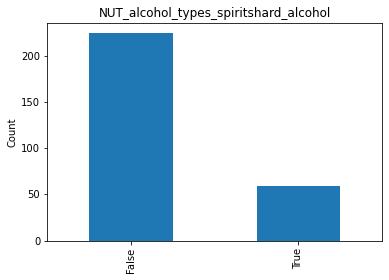

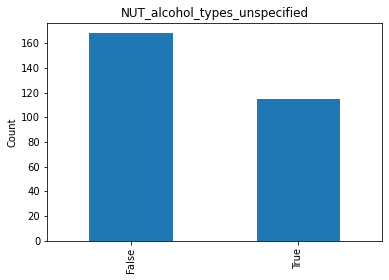

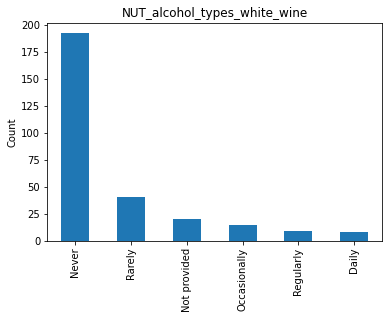

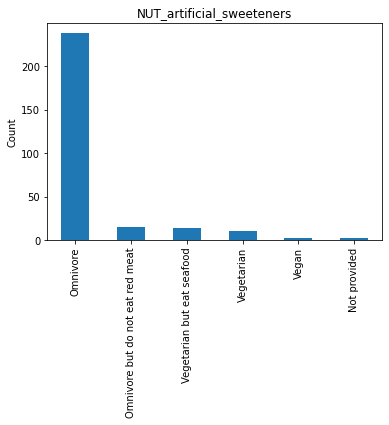

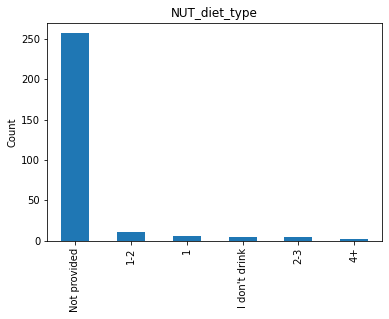

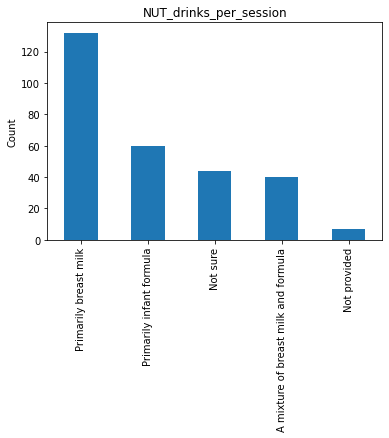

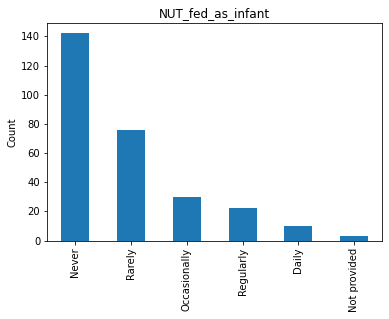

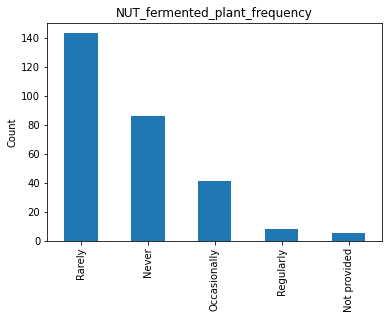

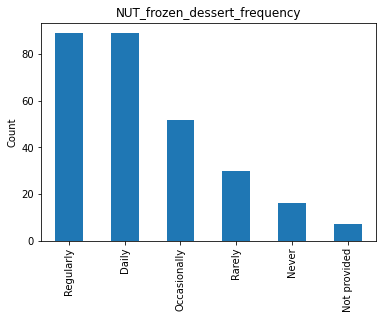

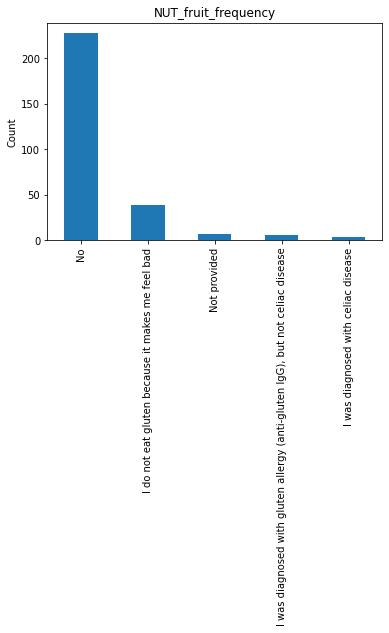

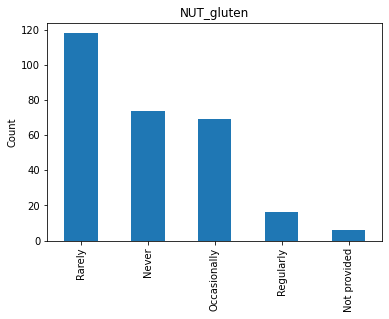

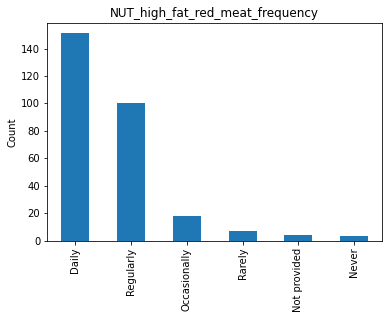

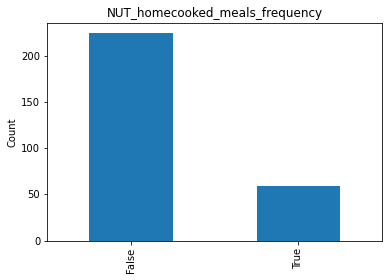

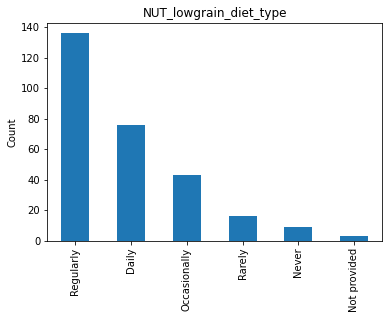

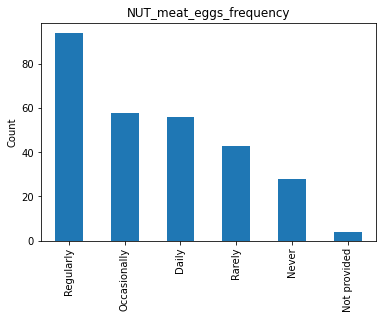

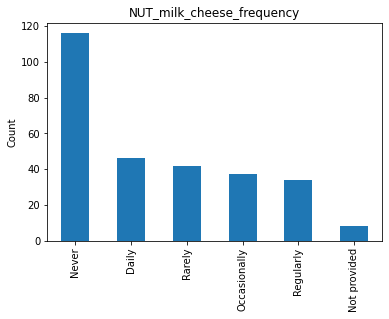

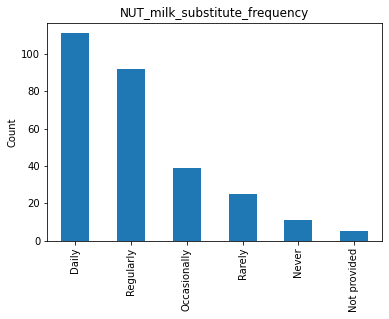

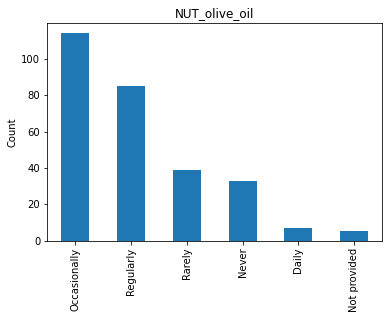

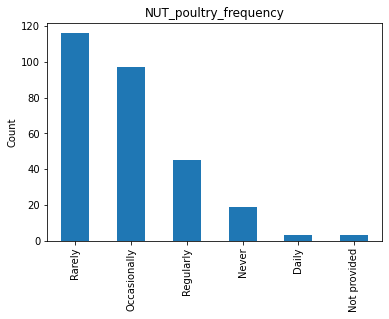

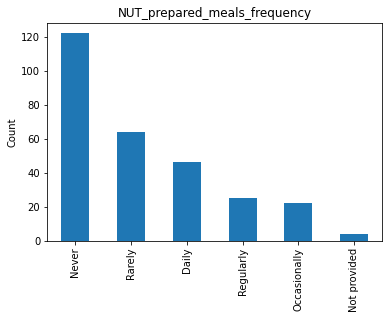

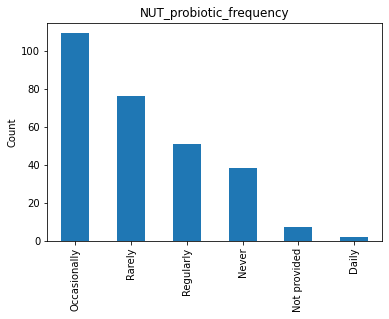

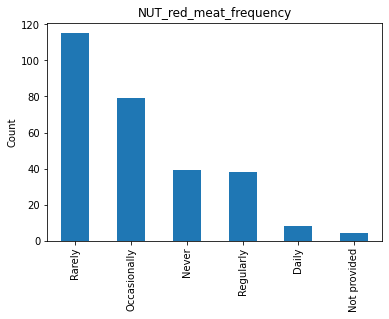

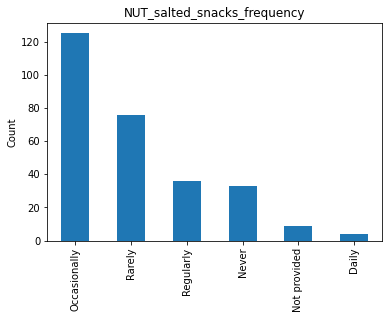

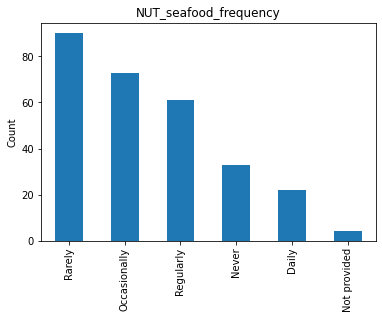

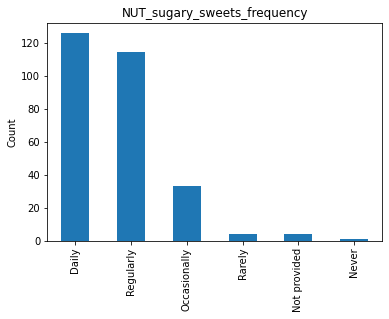

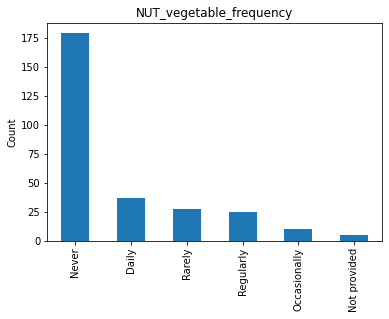

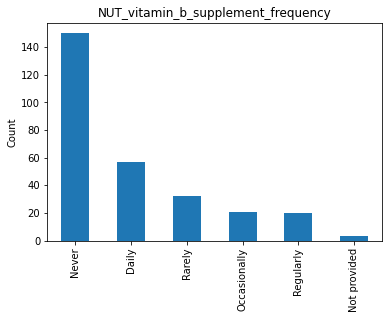

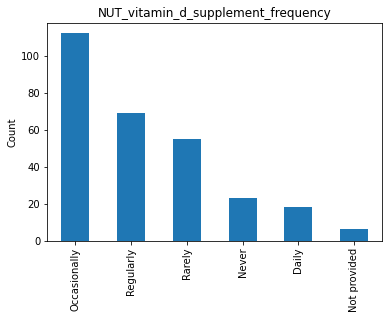

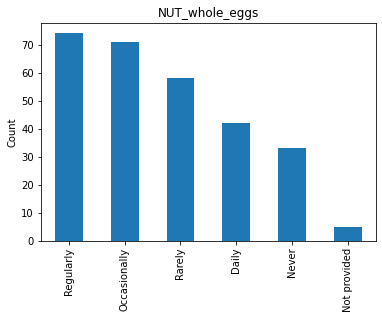

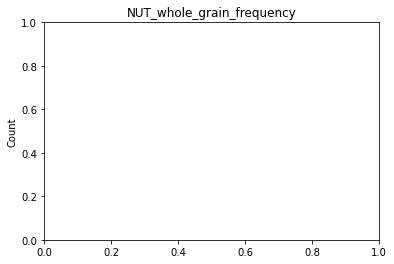

In [31]:
for col in names_NUT:
    df_NUT[col].value_counts().plot(kind='bar')
    plt.figure()
    plt.title(col)
    plt.ylabel('Count')

In [40]:
ALC_INDEX=df_meta.columns
ALC_INDEX = names[df_meta.columns.str.contains('lcohol')]

df_ALC = df_meta[ALC_INDEX]
df_ALC.head()

,NUT_alcohol_consumption,NUT_alcohol_frequency,NUT_alcohol_types_beercider,NUT_alcohol_types_red_wine,NUT_alcohol_types_sour_beers,NUT_alcohol_types_spiritshard_alcohol,NUT_alcohol_types_unspecified,NUT_alcohol_types_white_wine
1,False,Not provided,True,False,False,False,False,False
2,True,Regularly,True,False,False,False,False,False
3,False,Never,False,False,False,False,True,False
6,True,Daily,True,False,False,False,False,False
9,True,Regularly,True,False,False,False,False,True


In [ ]:
df_meta.columns.tolist()

First we check the Alcohol consumption frequency.

Text(0, 0.5, 'Count')

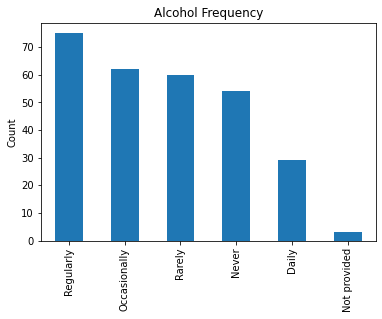

In [64]:
df_ALC['NUT_alcohol_frequency'].value_counts().plot(kind='bar')
plt.title('Alcohol Frequency')
plt.ylabel('Count')

In [76]:
#df_ALC = df_ALC.drop('NUT_alcohol_frequency', axis=1)


815

To get an general overview over the alcohol habits in our dataset we count the corresponding occurances.

In [107]:
counts = []
for column in df_ALC.columns:
    c=df_ALC[column].value_counts()[True]
    counts.append(c)

In [112]:
col = df_ALC.columns

In [127]:
df = pd.DataFrame({'Counts': df_counts},  col)
df

,Counts
NUT_alcohol_consumption,226
NUT_alcohol_types_beercider,134
NUT_alcohol_types_red_wine,172
NUT_alcohol_types_sour_beers,20
NUT_alcohol_types_spiritshard_alcohol,89
NUT_alcohol_types_unspecified,59
NUT_alcohol_types_white_wine,115


Text(0, 0.5, 'Count')

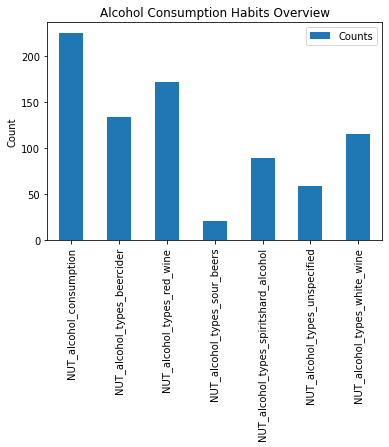

In [131]:
df.plot(kind='bar')
plt.title('Alcohol Consumption Habits Overview')
plt.ylabel('Count')